In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pathlib import Path
%matplotlib inline
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.4)

In [3]:
df = pd.read_csv("datasets/hypothyroid.csv")
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [4]:
df.head()


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [5]:
df.describe().T


,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on thyroxine,3772,2,f,3308
query on thyroxine,3772,2,f,3722
on antithyroid medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid surgery,3772,2,f,3719
I131 treatment,3772,2,f,3713
query hypothyroid,3772,2,f,3538


In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [7]:
df


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [8]:
df["binaryClass"].value_counts()


binaryClass
P    3481
N     291
Name: count, dtype: int64

In [9]:
df["binaryClass"]=df["binaryClass"].map({"P":0,"N":1})


In [10]:
df["pregnant"].value_counts()


pregnant
f    3719
t      53
Name: count, dtype: int64

In [11]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

df = df.replace({"t": 1, "f": 0}).infer_objects(copy=False)


In [12]:
df


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,0,0,0,0,0,0,0,...,1,125,1,1.14,1,109,0,?,SVHC,0
1,23,F,0,0,0,0,0,0,0,0,...,1,102,0,?,0,?,0,?,other,0
2,46,M,0,0,0,0,0,0,0,0,...,1,109,1,0.91,1,120,0,?,other,0
3,70,F,1,0,0,0,0,0,0,0,...,1,175,0,?,0,?,0,?,other,0
4,70,F,0,0,0,0,0,0,0,0,...,1,61,1,0.87,1,70,0,?,SVI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,0,0,0,0,0,0,0,...,0,?,0,?,0,?,0,?,other,0
3768,68,F,0,0,0,0,0,0,0,0,...,1,124,1,1.08,1,114,0,?,SVI,0
3769,74,F,0,0,0,0,0,0,0,0,...,1,112,1,1.07,1,105,0,?,other,0
3770,72,M,0,0,0,0,0,0,0,0,...,1,82,1,0.94,1,87,0,?,SVI,0


In [13]:
df['sex'].isnull().sum()


np.int64(0)

In [14]:
df["TBG"].value_counts()


TBG
?    3772
Name: count, dtype: int64

In [15]:
del df["TBG"]


In [16]:
df = df.replace({"?": np.nan})

In [17]:
df.isnull().sum()


age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
referral source                0
binaryClass                    0
dtype: int64

In [18]:
df["sex"].value_counts()


sex
F    2480
M    1142
Name: count, dtype: int64

In [19]:
df = df.replace({"F": 1, "M": 0}).infer_objects(copy=False)


In [20]:
df["referral source"].value_counts()


referral source
other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: count, dtype: int64

In [21]:
df = df.drop(["referral source"], axis=1)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [23]:
df["T3 measured"].value_counts()


T3 measured
1    3003
0     769
Name: count, dtype: int64

In [24]:
df["TT4 measured"].value_counts()


TT4 measured
1    3541
0     231
Name: count, dtype: int64

In [25]:
df["FTI measured"].value_counts()


FTI measured
1    3387
0     385
Name: count, dtype: int64

In [26]:
df["TBG measured"].value_counts()


TBG measured
0    3772
Name: count, dtype: int64

In [27]:
df["binaryClass"].value_counts()


binaryClass
0    3481
1     291
Name: count, dtype: int64

In [28]:
df.dtypes

age                           object
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                           object
T3 measured                    int64
T3                            object
TT4 measured                   int64
TT4                           object
T4U measured                   int64
T4U                           object
FTI measured                   int64
FTI                           object
TBG measured                   int64
b

In [29]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [30]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [31]:
df['T4U measured'].mean()

np.float64(0.8974019088016967)

In [32]:
df.fillna({'T4U measured': df['T4U measured'].mean()}, inplace=True)


In [33]:
df.fillna({'sex': df['sex'].mean()}, inplace=True)

In [34]:
df.fillna(df['age'].mean(), inplace=True)

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [36]:
df['TSH'] = imputer.fit_transform(df[['TSH']])

In [37]:
df['T3'] = imputer.fit_transform(df[['T3']])

In [38]:
df['TT4'] = imputer.fit_transform(df[['TT4']])

In [39]:
df['T4U'] = imputer.fit_transform(df[['T4U']])

In [40]:
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [41]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [42]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.500000,1,125.000000,1,1.140000,1,109.000000,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.000000,1,102.000000,0,51.735879,0,51.735879,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,51.735879,1,109.000000,1,0.910000,1,120.000000,0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.900000,1,175.000000,0,51.735879,0,51.735879,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.200000,1,61.000000,1,0.870000,1,70.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,1.0,0,0,0,0,0,0,0,0,...,0,51.735879,0,51.735879,0,51.735879,0,51.735879,0,0
3768,68.0,1.0,0,0,0,0,0,0,0,0,...,1,2.100000,1,124.000000,1,1.080000,1,114.000000,0,0
3769,74.0,1.0,0,0,0,0,0,0,0,0,...,1,1.800000,1,112.000000,1,1.070000,1,105.000000,0,0
3770,72.0,0.0,0,0,0,0,0,0,0,0,...,1,2.000000,1,82.000000,1,0.940000,1,87.000000,0,0


In [43]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

In [44]:
df.to_csv('datasets/prepocessed_hyperthyroid.csv')

In [45]:
x = df.drop('binaryClass', axis=1)
y = df['binaryClass']

In [46]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.500000,1,125.0,1,1.140000,1,109.000000,0,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.000000,1,102.0,0,51.735879,0,51.735879,0,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,51.735879,1,109.0,1,0.910000,1,120.000000,0,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.900000,1,175.0,0,51.735879,0,51.735879,0,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.200000,1,61.0,1,0.870000,1,70.000000,0,0


In [47]:
x.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.30,1,2.500000,1,125.0,1,1.140000,1,109.000000,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.10,1,2.000000,1,102.0,0,51.735879,0,51.735879,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.98,0,51.735879,1,109.0,1,0.910000,1,120.000000,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.16,1,1.900000,1,175.0,0,51.735879,0,51.735879,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.72,1,1.200000,1,61.0,1,0.870000,1,70.000000,0


In [48]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: binaryClass, dtype: int64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
print(x.shape, x_train.shape, x_test.shape)

(3772, 27) (3017, 27) (755, 27)


## **Feature Selection- Dropping constant features**


In [51]:
x_train = x_train.drop(['FTI', 'FTI measured', 'T4U measured', 'TT4 measured','query on thyroxine','on antithyroid medication','sick', 'pregnant','thyroid surgery','I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary','psych' , 'TSH measured', 'T4U', 'TBG measured'],axis=1)
x_test = x_test.drop(['FTI', 'FTI measured', 'T4U measured', 'TT4 measured','query on thyroxine','on antithyroid medication','sick', 'pregnant','thyroid surgery','I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary','psych' , 'TSH measured', 'T4U', 'TBG measured'],axis=1)

In [52]:
x_train.columns

Index(['age', 'sex', 'on thyroxine', 'TSH', 'T3 measured', 'T3', 'TT4'], dtype='object')

## **Model Training**

In [53]:
model = LogisticRegression()

In [54]:
model.fit(x_train, y_train)

LogisticRegression()

In [55]:
# accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [56]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9323831620815379


In [57]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [58]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9364238410596026


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:

models = {
    "Random Forest": RandomForestClassifier(n_estimators=20),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


In [61]:
final_scores = {}

for name, model in models.items():
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    final_scores[name] = accuracy
    print(f"{name} Test Accuracy: {accuracy:.4f}")


Random Forest Test Accuracy: 0.9947
Support Vector Machine Test Accuracy: 0.9404
K-Nearest Neighbors Test Accuracy: 0.9616
Decision Tree Test Accuracy: 0.9921


In [62]:
# Convert accuracy scores into a DataFrame
accuracy_df = pd.DataFrame(list(final_scores.items()), columns=["Classifier", "Test Accuracy"])
print(accuracy_df)


               Classifier  Test Accuracy
0           Random Forest       0.994702
1  Support Vector Machine       0.940397
2     K-Nearest Neighbors       0.961589
3           Decision Tree       0.992053


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Accuracy: 0.9920452923022856


In [64]:
y_pred = best_dt.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9933774834437086
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       697
           1       0.92      1.00      0.96        58

    accuracy                           0.99       755
   macro avg       0.96      1.00      0.98       755
weighted avg       0.99      0.99      0.99       755

Confusion Matrix:
 [[692   5]
 [  0  58]]


In [65]:
model=best_dt

In [66]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

input_data = (44,0,0,45,1,1.4,39)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a HyperThyroid Disease')
else:
  print('The Person has HyperThyroid Disease')


[1]
The Person has HyperThyroid Disease


In [67]:
feature_names=['age', 'sex', 'on thyroxine', 'TSH', 'T3 measured', 'T3', 'TT4']

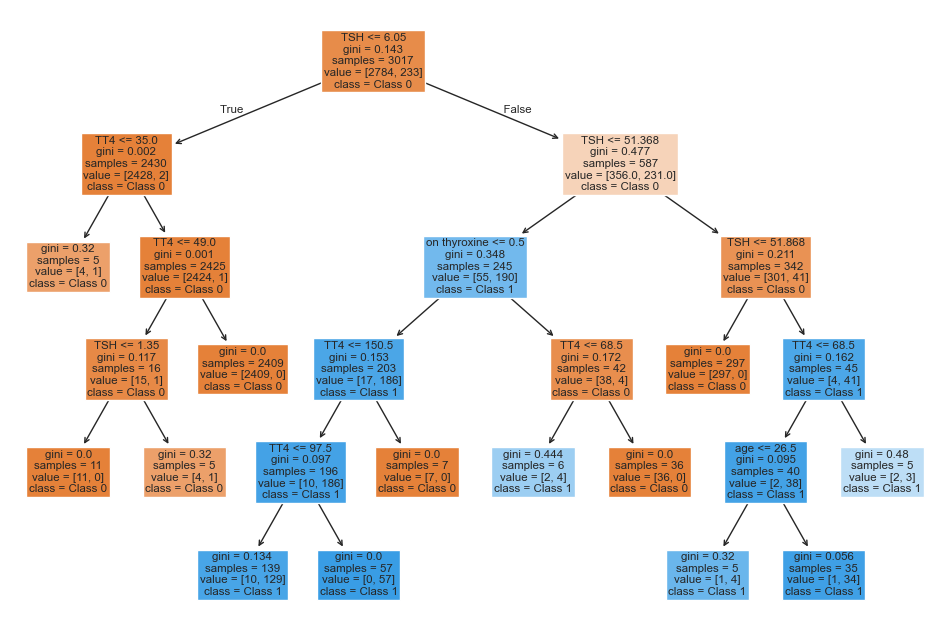

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=feature_names, class_names=['Class 0', 'Class 1'], filled=True)
plt.show()


## **Saving the trained model**





In [69]:
import pickle

In [70]:
filename = 'models/Thyroid_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [71]:
# loading the saved model
loaded_model = pickle.load(open(filename, 'rb'))

In [72]:
for column in x_train.columns:
  print(column)

age
sex
on thyroxine
TSH
T3 measured
T3
TT4


In [73]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3017 entries, 2661 to 3174
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           3017 non-null   float64
 1   sex           3017 non-null   float64
 2   on thyroxine  3017 non-null   int64  
 3   TSH           3017 non-null   float64
 4   T3 measured   3017 non-null   int64  
 5   T3            3017 non-null   float64
 6   TT4           3017 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 188.6 KB


In [74]:
print("Best Parameters:", model.get_params())


Best Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [75]:
feature_importance = pd.Series(model.feature_importances_, index=feature_names)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))


Feature Importance:
 TSH             0.834987
on thyroxine    0.117394
TT4             0.046976
age             0.000643
sex             0.000000
T3 measured     0.000000
T3              0.000000
dtype: float64


In [77]:
import joblib

# Load the model from the .pkl file
model = joblib.load('models/Thyroid_model.pkl')

# Check the type of the model
print(type(model))


<class 'sklearn.tree._classes.DecisionTreeClassifier'>
